### Treść zadania

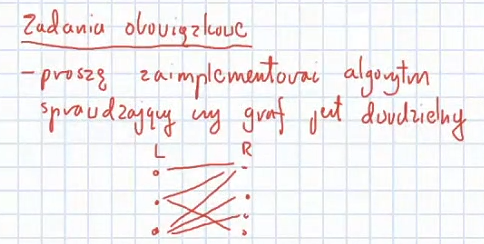

### Omówienie algorytmu

Wszystkie wersje algorytmu są bardzo proste i polegają na tym, że próbujemy znaleźć pokolorowanie grafu 2 kolorami. W takiej sytuacji najlepiej wybrać kolory, reprezentowane przez liczby $ 1 $ i $ -1 $, a następnie zapisywać je w tablicy, odgrywającej równocześnie rolę tablicy $ visited $. Jeżeli w tablicy się znajdzie wartość $ 0 $, oznacza to, że jeszcze nie pokolorowaliśmy danego wierzchołka, więc kolorujemy go kolorem $ 1 $, jeżeli wierzchołek, z którego do niego weszliśmy ma kolor $ -1 $ lub kolorem $ -1 $, jeżeli miał on kolor $ 1 $. W momencie, w którym natrafimy na wierzchołek już pokolorowany, połączony z obecnie sprawdzanym wierzchołkiem, sprawdzamy, czy ma on inny kolor niż obecnie sprawdzany wierzchołek. Jeżeli tak, to na razie jest wszystko w porządku i sprawdzamy dalej, a jeżeli nie, oznacza to, że graf nie jest dwudzielny.

### Złożoność

Taka sama, jak BFS i DFS, czyli odpowiednio:
###### Dla reprezentacji, przy pomocy list sąsiedztwa:
$ O(V + E) $, gdzie $ V $ - liczba wierzchołków, $ E $ - liczba krawędzi,
###### Dla reprezentacji, przy pomocy macierzy:
$ O(V^2) $, gdzie $ V $ - liczba wierzchołków,

### Pomocnicze

In [1]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

In [2]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[False] * n for _ in range(n)]
    # Store Nones on the main diagonal
    for i in range(n):
        M[i][i] = None
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = True
    return M

### Implementacja #1
#### Dla reprezentacji listowej, przy pomocy DFS
##### Szybkie rozwiązanie, działa dla grafów niespójnych

Wynik z leetcode:
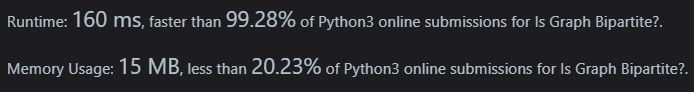

In [3]:
def is_bipartite(G: 'graph represented using adjacency lists') -> bool:
    n = len(G)
    colors = [0] * n  # 0 means no color (we will use 2 colors as we want to check if it's bipartite)

    def dfs(u):
        for v in G[u]:
            if not colors[v]:
                colors[v] = -1 * colors[u]
                if not dfs(v): return False
            elif colors[v] == colors[u]:
                return False
        return True

    for u in range(n):
        if not colors[u]:
            colors[u] = 1
            if not dfs(u): return False

    return True

###### Kilka testów

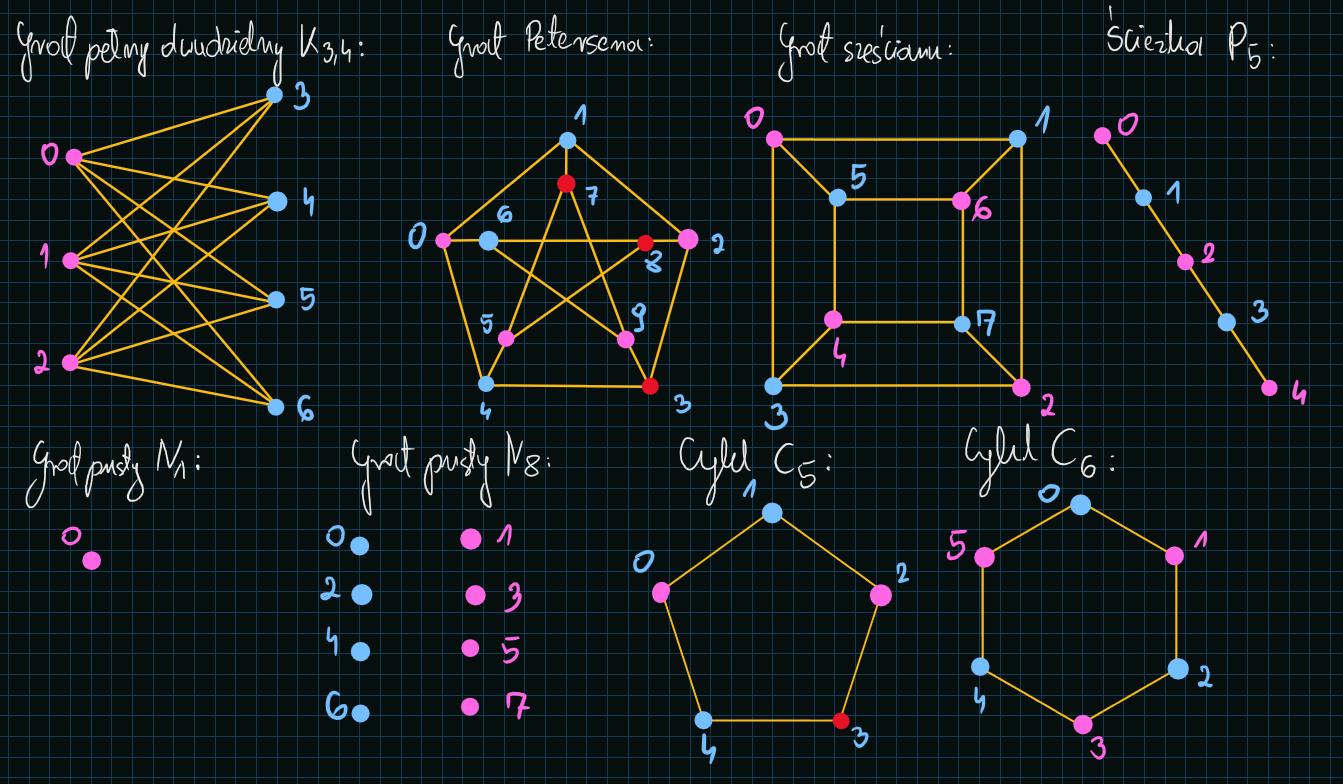

##### Pełny dwudzielny $ K_{3,4} $:

In [4]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_list(E, 7)

print(*G, sep='\n')
print(is_bipartite(G))

[3, 4, 5, 6]
[3, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
True


##### Graf Petersena:

In [5]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E, 10)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 6, 4]
[0, 7, 2]
[1, 8, 3]
[2, 4, 9]
[0, 3, 5]
[4, 8, 7]
[0, 8, 9]
[1, 5, 9]
[2, 6, 5]
[3, 7, 6]
False


##### Graf sześcianu (kostka $ Q_3 $):

In [6]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_list(E, 8)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 3, 5]
[0, 2, 6]
[1, 3, 7]
[2, 0, 4]
[5, 7, 3]
[4, 6, 0]
[5, 7, 1]
[6, 4, 2]
True


##### Ścieżka $ P_5 $:

In [7]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3]
True


##### Graf pusty $ N_1 $:

In [8]:
G = [[]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[]
True


##### Graf pusty $ N_8 $:

In [9]:
G = [[] for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[]
[]
[]
[]
[]
[]
[]
[]
True


##### Cykl $ C_5 $:

In [10]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 4]
[0, 2]
[1, 3]
[2, 4]
[3, 0]
False


##### Cykl $ C_6 $:

In [11]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_list(E, 6)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 5]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 0]
True


### Implementacja #2
#### Dla reprezentacji macierzowej, przy pomocy DFS
##### Szybkie rozwiązanie, działa dla grafów niespójnych

In [12]:
def is_bipartite(G: 'graph represented using adjacency lists') -> bool:
    n = len(G)
    colors = [0] * n  # 0 means no color (we will use 2 colors as we want to check if it's bipartite)

    def dfs(u):
        for v in range(n):
            if not G[u][v]: continue
            if not colors[v]:
                colors[v] = -1 * colors[u]
                if not dfs(v): return False
            elif colors[v] == colors[u]:
                return False
        return True

    for u in range(n):
        if not colors[u]:
            colors[u] = 1
            if not dfs(u): return False

    return True

###### Kilka testów

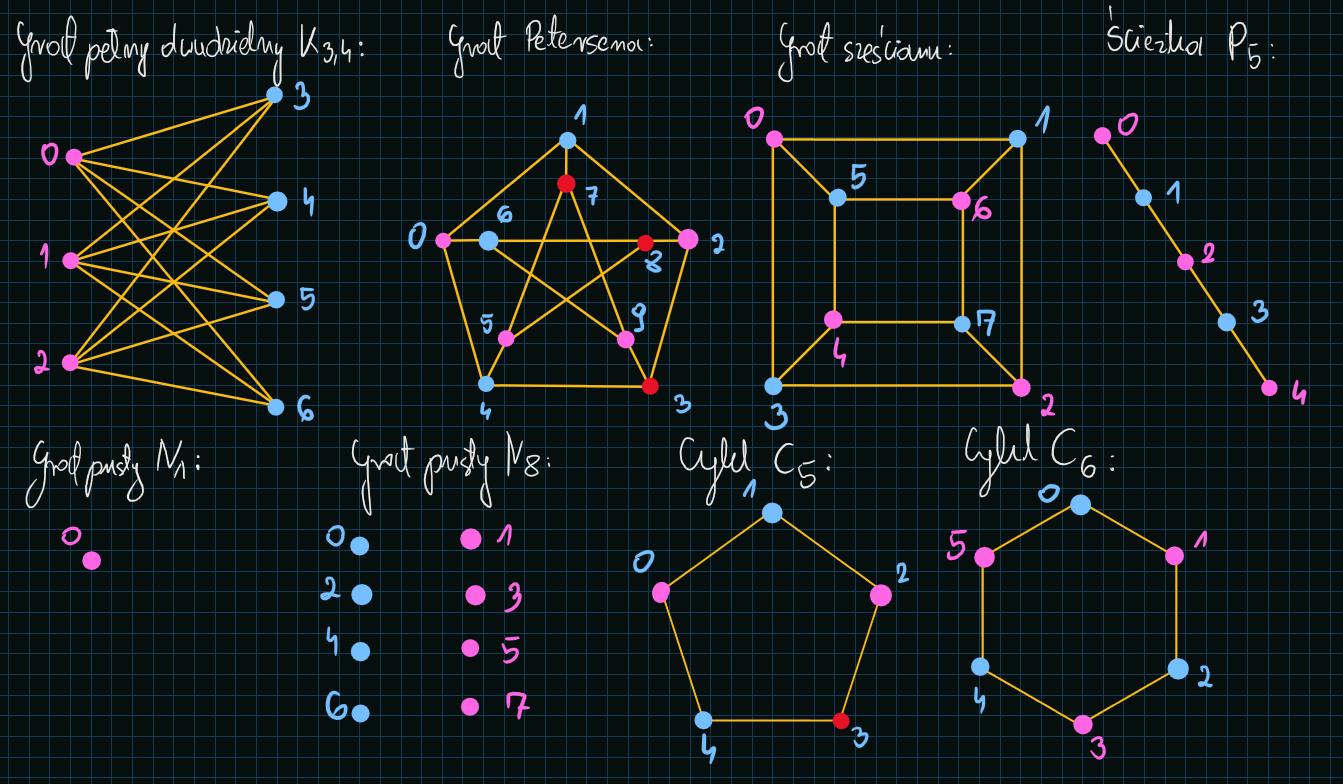

##### Pełny dwudzielny $ K_{3,4} $:

In [13]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)

print(*G, sep='\n')
print(is_bipartite(G))

[None, False, False, True, True, True, True]
[False, None, False, True, True, True, True]
[False, False, None, True, True, True, True]
[True, True, True, None, False, False, False]
[True, True, True, False, None, False, False]
[True, True, True, False, False, None, False]
[True, True, True, False, False, False, None]
True


##### Graf Petersena:

In [14]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, True, False, True, False, False, False]
[True, None, True, False, False, False, False, True, False, False]
[False, True, None, True, False, False, False, False, True, False]
[False, False, True, None, True, False, False, False, False, True]
[True, False, False, True, None, True, False, False, False, False]
[False, False, False, False, True, None, False, True, True, False]
[True, False, False, False, False, False, None, False, True, True]
[False, True, False, False, False, True, False, None, False, True]
[False, False, True, False, False, True, True, False, None, False]
[False, False, False, True, False, False, True, True, False, None]
False


##### Graf sześcianu (kostka $ Q_3 $):

In [15]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, True, False, True, False, False]
[True, None, True, False, False, False, True, False]
[False, True, None, True, False, False, False, True]
[True, False, True, None, True, False, False, False]
[False, False, False, True, None, True, False, True]
[True, False, False, False, True, None, True, False]
[False, True, False, False, False, True, None, True]
[False, False, True, False, True, False, True, None]
True


##### Ścieżka $ P_5 $:

In [16]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, False]
[True, None, True, False, False]
[False, True, None, True, False]
[False, False, True, None, True]
[False, False, False, True, None]
True


##### Graf pusty $ N_1 $:

In [17]:
G = [[0]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[0]
True


##### Graf pusty $ N_8 $:

In [18]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
True


##### Cykl $ C_5 $:

In [19]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, True]
[True, None, True, False, False]
[False, True, None, True, False]
[False, False, True, None, True]
[True, False, False, True, None]
False


##### Cykl $ C_6 $:

In [20]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_matrix(E, 6)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, False, True]
[True, None, True, False, False, False]
[False, True, None, True, False, False]
[False, False, True, None, True, False]
[False, False, False, True, None, True]
[True, False, False, False, True, None]
True


### Implementacja #3
#### Dla reprezentacji listowej, przy pomocy BFS
##### Niezbyt szybkie rozwiązanie, wyłącznie dla grafów spójnych

In [21]:
from queue import Queue


def is_bipartite(G: 'graph represented using adjacency lists'):
    n = len(G)
    queue = Queue()
    colors = [0] * n  # 0 means no color (we will use 2 colors as we want to check if it's bipartite)
    
    # Loop over all vertices (for inconsistent graphs)
    for i in range(n):
        if colors[i]: continue
        queue.put((i, 1))  # Start with color 1
        while not queue.empty():
            j, color = queue.get()
            colors[j] = color
            for k in G[j]:
                if not colors[k]:
                    queue.put((k, -1 * color))  # Reverse color to the other one
                # If a vertex already has a color, check if this color is a proper one
                elif colors[k] == color:  # If the same color, a graph isn't bipartite
                    return False
    return True

###### Kilka testów

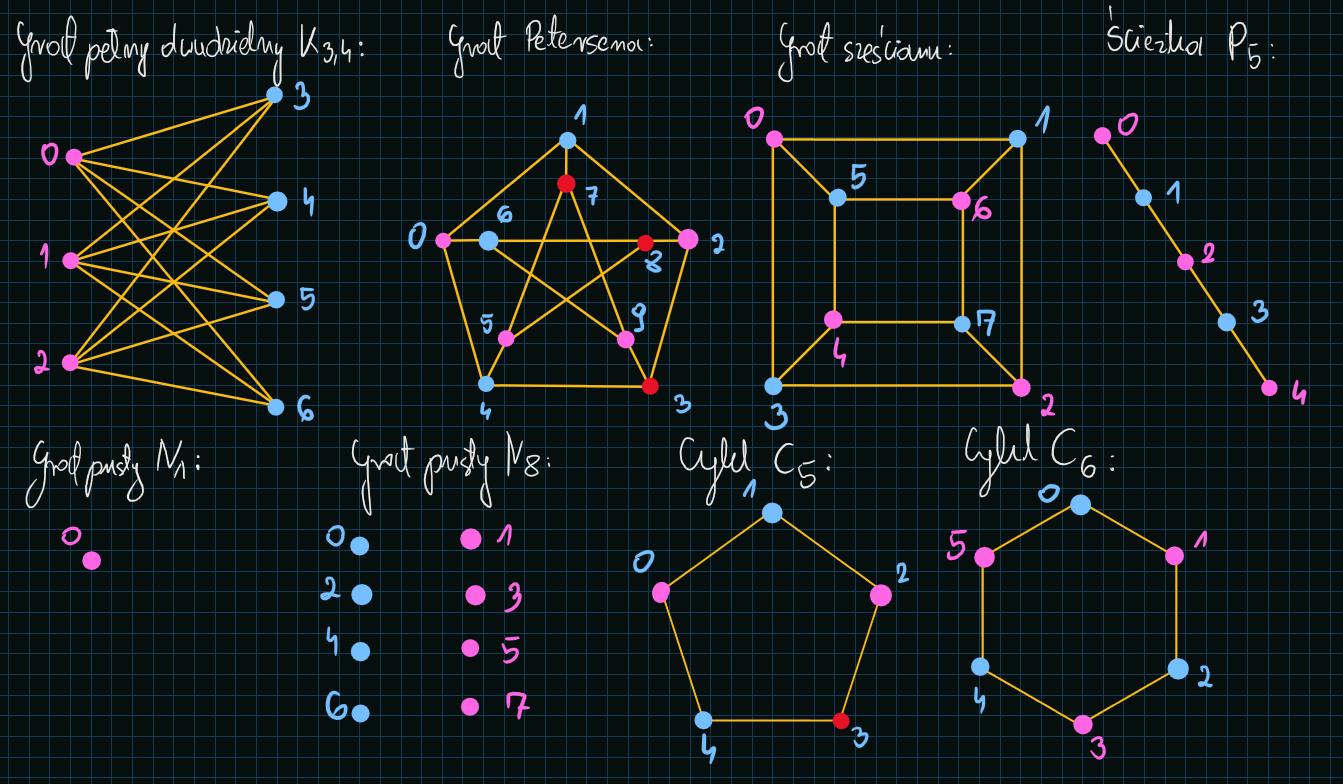

##### Pełny dwudzielny $ K_{3,4} $:

In [22]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_list(E, 7)

print(*G, sep='\n')
print(is_bipartite(G))

[3, 4, 5, 6]
[3, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
True


##### Graf Petersena:

In [23]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_list(E, 10)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 6, 4]
[0, 7, 2]
[1, 8, 3]
[2, 4, 9]
[0, 3, 5]
[4, 8, 7]
[0, 8, 9]
[1, 5, 9]
[2, 6, 5]
[3, 7, 6]
False


##### Graf sześcianu (kostka $ Q_3 $):

In [24]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_list(E, 8)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 3, 5]
[0, 2, 6]
[1, 3, 7]
[2, 0, 4]
[5, 7, 3]
[4, 6, 0]
[5, 7, 1]
[6, 4, 2]
True


##### Ścieżka $ P_5 $:

In [25]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[1]
[0, 2]
[1, 3]
[2, 4]
[3]
True


##### Graf pusty $ N_1 $:

In [26]:
G = [[]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[]
True


##### Graf pusty $ N_8 $:

In [27]:
G = [[] for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[]
[]
[]
[]
[]
[]
[]
[]
True


##### Cykl $ C_5 $:

In [28]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 4]
[0, 2]
[1, 3]
[2, 4]
[3, 0]
False


##### Cykl $ C_6 $:

In [29]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_list(E, 6)

print(*G, sep='\n')
print(is_bipartite(G))

[1, 5]
[0, 2]
[1, 3]
[2, 4]
[3, 5]
[4, 0]
True


### Implementacja #4
#### Dla reprezentacji macierzowej, przy pomocy BFS
##### Niezbyt szybkie rozwiązanie, wyłącznie dla grafów spójnych

In [30]:
from queue import Queue


def is_bipartite(G: 'graph represented using matrix'):
    n = len(G)
    queue = Queue()
    colors = [0] * n  # 0 means no color (we will use 2 colors as we want to check if it's bipartite)
    
    # Loop over all vertices (for inconsistent graphs)
    for i in range(n):
        if colors[i]: continue
        queue.put((i, 1))  # Start with color 1
        while not queue.empty():
            j, color = queue.get()
            colors[j] = color
            for k in range(n):
                if G[j][k]:
                    if not colors[k]:
                        queue.put((k, -1 * color))  # Reverse color to the other one
                    # If a vertex already has a color, check if this color is a proper one
                    elif colors[k] == color:  # If the same color, a graph isn't bipartite
                        return False
    return True

###### Kilka testów

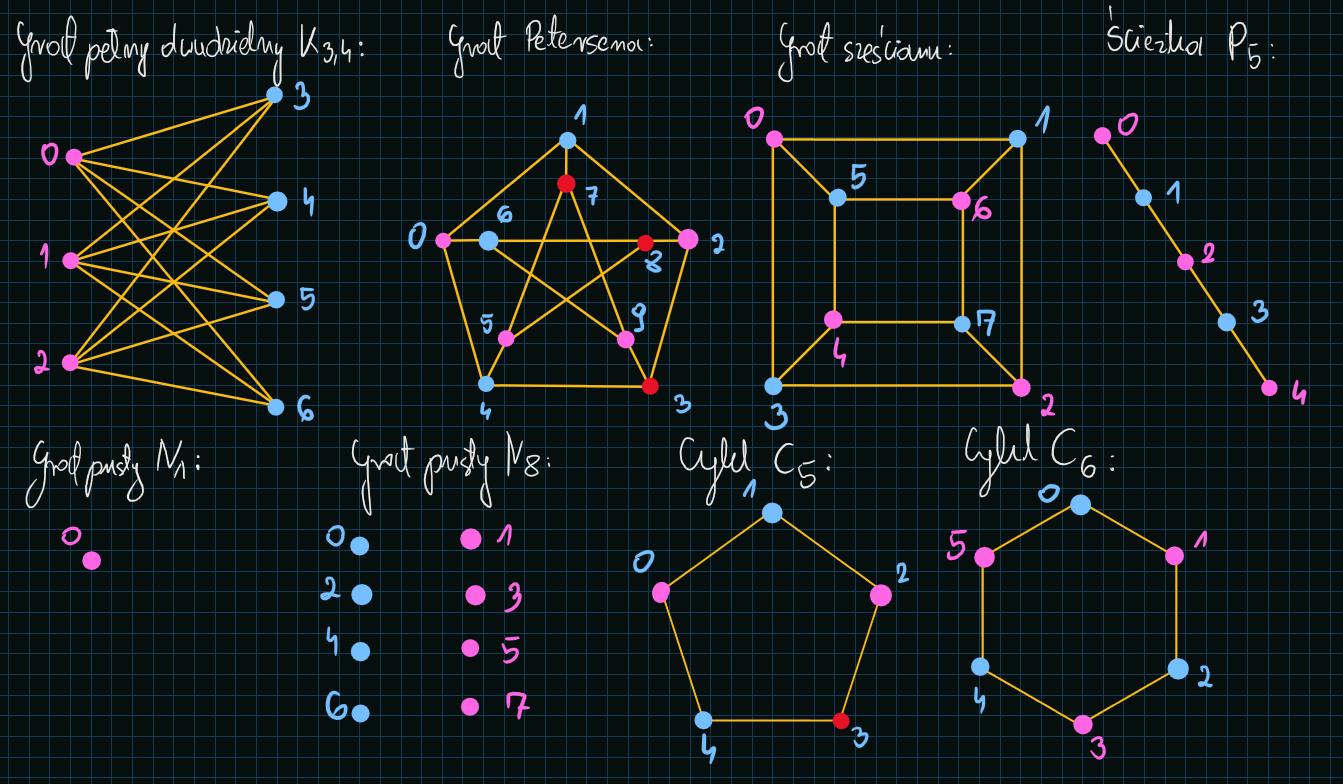

##### Pełny dwudzielny $ K_{3,4} $:

In [31]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)

print(*G, sep='\n')
print(is_bipartite(G))

[None, False, False, True, True, True, True]
[False, None, False, True, True, True, True]
[False, False, None, True, True, True, True]
[True, True, True, None, False, False, False]
[True, True, True, False, None, False, False]
[True, True, True, False, False, None, False]
[True, True, True, False, False, False, None]
True


##### Graf Petersena:

In [32]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, True, False, True, False, False, False]
[True, None, True, False, False, False, False, True, False, False]
[False, True, None, True, False, False, False, False, True, False]
[False, False, True, None, True, False, False, False, False, True]
[True, False, False, True, None, True, False, False, False, False]
[False, False, False, False, True, None, False, True, True, False]
[True, False, False, False, False, False, None, False, True, True]
[False, True, False, False, False, True, False, None, False, True]
[False, False, True, False, False, True, True, False, None, False]
[False, False, False, True, False, False, True, True, False, None]
False


##### Graf sześcianu (kostka $ Q_3 $):

In [33]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, True, False, True, False, False]
[True, None, True, False, False, False, True, False]
[False, True, None, True, False, False, False, True]
[True, False, True, None, True, False, False, False]
[False, False, False, True, None, True, False, True]
[True, False, False, False, True, None, True, False]
[False, True, False, False, False, True, None, True]
[False, False, True, False, True, False, True, None]
True


##### Ścieżka $ P_5 $:

In [34]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, False]
[True, None, True, False, False]
[False, True, None, True, False]
[False, False, True, None, True]
[False, False, False, True, None]
True


##### Graf pusty $ N_1 $:

In [35]:
G = [[0]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[0]
True


##### Graf pusty $ N_8 $:

In [36]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(is_bipartite(G))

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
True


##### Cykl $ C_5 $:

In [37]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, True]
[True, None, True, False, False]
[False, True, None, True, False]
[False, False, True, None, True]
[True, False, False, True, None]
False


##### Cykl $ C_6 $:

In [38]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_matrix(E, 6)

print(*G, sep='\n')
print(is_bipartite(G))

[None, True, False, False, False, True]
[True, None, True, False, False, False]
[False, True, None, True, False, False]
[False, False, True, None, True, False]
[False, False, False, True, None, True]
[True, False, False, False, True, None]
True
